In [2]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def next_step(Func,Yn,h,T_range_n):
    
    return fsolve(lambda y1: y1-(Yn+h*Func(y1,T_range_n)) ,Yn )

def inv_Euler(Func,in_C,T_range):
    Y=np.empty_like(T_range)
    Y[0]=in_C
    for n in np.arange(N-1):
        h = T_range[n+1]-T_range[n]
        
        Y[n+1]=next_step(Func,Y[n],h,T_range[n])

    return Y

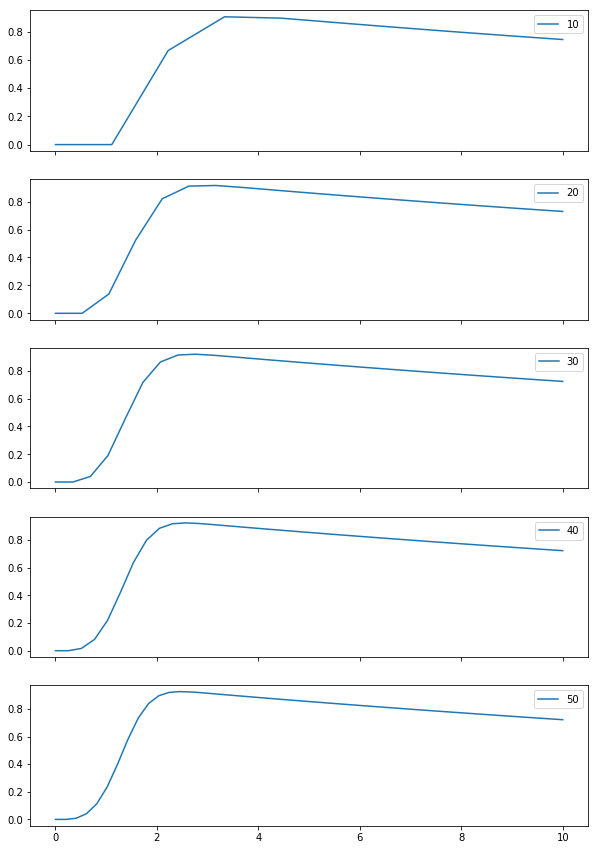

In [4]:
def dxdt(x,t):

    return -(x**2-np.exp(-2*t/30))*t**2



n=5
fig, ax = plt.subplots(nrows=5, ncols=1,sharex=True,figsize=(10, 15))

s=0
for i in ax:
    N=10*(s+1)
    t_range=np.linspace(0,10,N)
    R_Euler=inv_Euler(dxdt,0,t_range)
   


    i.plot(t_range,R_Euler,label=N)
    i.legend()
    s+=1
plt.show();



In [6]:
def N_diff_eq_test(Funcs,in_C,T_range):
    N=len(T_range) 
    try:
        dim=len(Funcs)
    except:
        dim=1
        Funcs=[Funcs]
        in_C=[in_C]

        
    Y=np.empty([N,dim])

    for i in np.arange(dim):
        Y[0][i]=in_C[i]
    
    for n in np.arange(N-1):
        h = T_range[n+1]-T_range[n]

        
        Y[n+1]=fsolve(lambda y1: \
            [y1[i]-(Y[n][i]+h*Funcs[i]([y1[j] for j in np.arange(dim)],T_range[n]))\
                    for i in np.arange(dim) ] ,[Y[n][i] for i in np.arange(dim)] )

        
            
    return Y

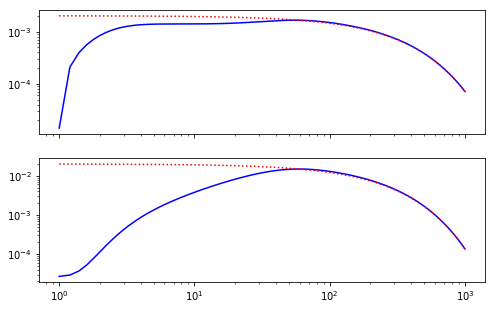

In [7]:
xeq=lambda t: np.exp(-t/300.)/500
yeq=lambda t: np.exp(-t/200.)/50

def dxdt(r,t):
    x=r[0]
    y=r[1]
    return -(1.e-3*(x**2/xeq(t)**2-y**2/yeq(t)**2)+\
               1.e-3*(x**2/xeq(t)**2-1))

def dydt(r,t):
    x=r[0]
    y=r[1]
    return -(1.e-3*(y**2/yeq(t)**2-x**2/xeq(t)**2)+\
               1.e-10*(y**2/yeq(t)**2-1))

N=5000
tmax=1000
t_range=np.linspace(1,tmax,N)

sol=N_diff_eq_test([dxdt,dydt],[xeq(tmax)/5.,yeq(tmax)/5.],t_range)


fig, ax = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(8, 5))


ax[0].plot(t_range,sol[:,0],'b')
eq=[xeq(i) for i in t_range]
ax[0].plot(t_range,eq,'r:')



ax[1].plot(t_range,sol[:,1],'b')
eq=[yeq(i) for i in t_range]
ax[1].plot(t_range,eq,'r:')


ax[0].semilogy()
ax[0].semilogx()
ax[1].semilogy()
ax[1].semilogx()

plt.show();